In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import sys
from pathlib import Path

project_root = Path.cwd().parent
sys.path.insert(0, str(project_root))

from src.simulation_options import simulateSinglePorosity, simulateDualPorosity


In [2]:
mrt = 25
pe = 3
rf = 1.5
recRatio = 0
dualPorosity_param = 0.2
matrix_retardation = 10
wsCoef = 0

timeValues = np.linspace(0.01, 60, 50)
bckConc = 2.30  # micro-gram/L
injConc = np.array([7, bckConc])
injdur = 90  # min
injDur = np.cumsum(np.array([injdur/60]))  # hours
delay_time = 0


# dualporosity with retardation
dpBTC = simulateDualPorosity(
    mrt, pe, rf,
    timeValues,
    bckConc,
    injConc,
    injDur,
    recRatio,
    dualPorosity_param,
    matrix_retardation,
    wsCoef=wsCoef,
    delay_time=delay_time
)


# dual porosity with only diffusion
dpBTCDiff = simulateDualPorosity(
    mrt, pe, rf,
    timeValues,
    bckConc,
    injConc,
    injDur,
    recRatio,
    dualPorosity_param,
    1,
    wsCoef=wsCoef,
    delay_time=delay_time
)

# single porosity with retardation
spBTC = simulateSinglePorosity(
            mrt,
            pe,
            rf,
            timeValues,
            bckConc,
            injConc,
            injDur
    )






In [3]:
# optional to save results for visualization

df = {'Time (hr)': timeValues,
      'Single Poro': spBTC - bckConc,
      'Dual Poro': dpBTC - bckConc,
      'Dual Poro Diff': dpBTCDiff - bckConc}

df = pd.DataFrame(df)
df.to_csv('../outputs/Figure_6.csv')

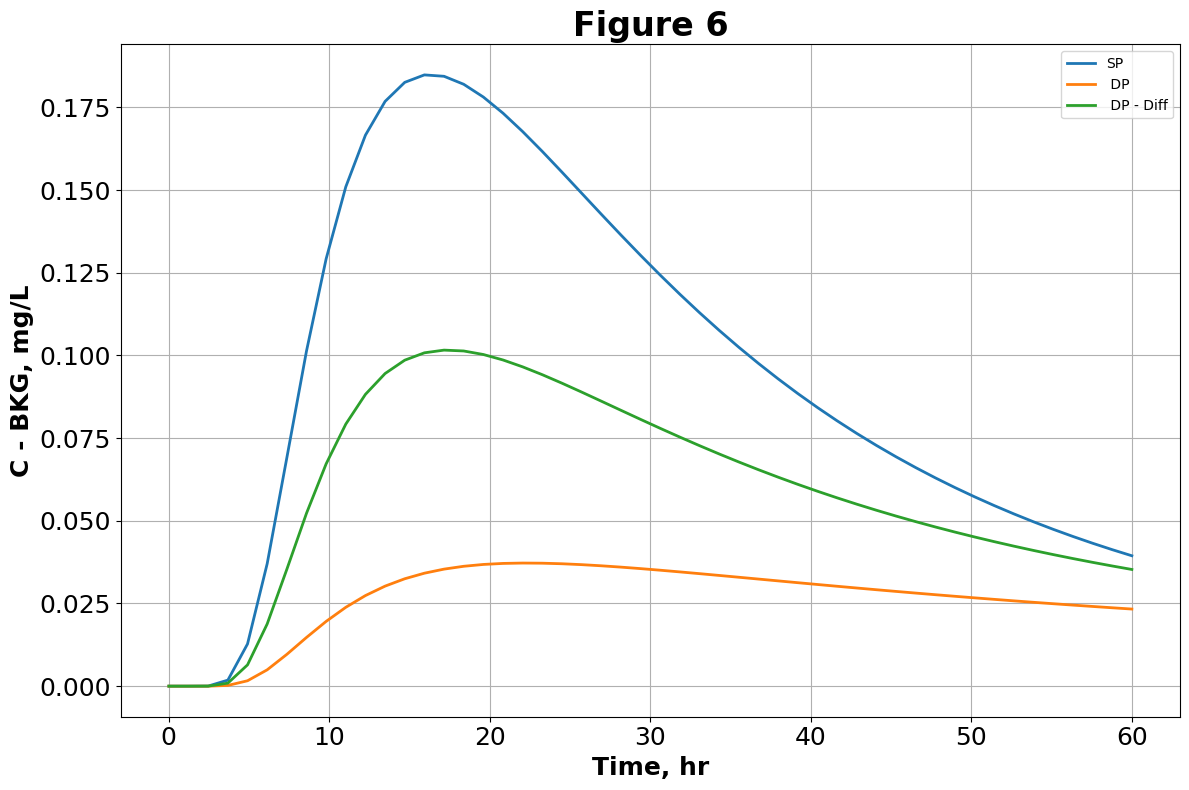

In [4]:

plt.figure(figsize=(12, 8))

plt.plot(timeValues, spBTC - bckConc , label="SP", lw=2)
plt.plot(timeValues, dpBTC - bckConc, label=" DP", lw=2)
plt.plot(timeValues, dpBTCDiff - bckConc, label=" DP - Diff", lw=2)

plt.title("Figure 6", fontsize=24, fontweight="bold")
plt.xlabel("Time, hr", fontsize=18, fontweight='bold')
plt.ylabel("C - BKG, mg/L", fontsize=18, fontweight='bold')
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
plt.grid()
plt.tight_layout()
plt.legend()
# os.makedirs('Figures', exist_ok=True)
# plt.savefig('Figures/Figure_6.jpg')
plt.show()


In [5]:
# transofrm dual porosity parameter to physical paramters

phiF = 0.9
Dm = 5.4e-8 * 3600 # m2/hr
b = 0.001
dualPorosity_param = 0.2

phiM = dualPorosity_param * phiF*b/np.sqrt(Dm)



print(f"Equivalent secondary porosity = {phiM}")

Equivalent secondary porosity = 0.012909944487358056
